# Resumo do pedido

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. 

Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.

Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.
(O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)

O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.

# 1.1 Carregando bibliotecas necessárias

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

# 1.2 Carregando dados fornecidos

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

# 2.1 Pré-processamento dos dados

# 2.2.1 Análises Iniciais

Primeiro, vamos checar as informações do dataset fornecido: checar os dados presentes, quais são os tipos de dados que temos, checar valores ausentes e duplicatas. 

Após essas checagens, vamos fazer as mudanças necessárias. 

In [3]:
"""Checando as informações da tabela"""

games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
"""Verificando valores estatísticos"""

games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Checagem de valores ausentes e duplicatas:

In [5]:
games_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
games_data.duplicated().sum()

0

E agora é importante mostrar uma primeira amostra dos dados que nós temos

In [7]:
games_data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Resultados da primeira análise:

1) Os nomes de todas as colunas estão em maiúsculo. Não é adequado manter as colunas com título em maiúsculo, então vamos mudar todos pra letra minúscula. 

2) Com relação aos tipos de dados das colunas:
   - Year_of_Release: é uma data, então precisa ser convertida pra um tipo int onde mostre somente o número inteiro. Nesse caso como estamos usando somente o ano não precisamos fazer a conversão pra tipo datetime, que seria o caso se tivessemos a data completa. 
   - User_Score: é uma nota numérica, então deveria estar em tipo float, pois as notas possuem casa decimal. 

(Importante: como já checamos a presença de valores ausentes, esses irão atrapalhar a conversão, então vamos realizar uma adaptação na conversão do tipo de dado pra reconhecer valores ausentes como tipo numeric.)
   


3) Muitas colunas apresentaram valores ausentes, principalmente as colunas relacionadas às notas dos jogos. Vamos realizar a checagem desses jogos que possuem valores ausentes e substituir ou excluir de acordo com nossa análise. Lembrando que precisamos identificar quais parâmetros influenciam no sucesso de um jogo, então esses parâmetros precisam estar todos acordados pra que as notas façam sentido.

# 2.2.2 Corrigindo Dados

Primeiro vamos corrigir as colunas com letras maíusculas no começo do título. 

In [8]:
games_data = games_data.rename(columns = str.lower)
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Alterando os tipos de dados na coluna 'year_of_release' e 'user_score'.

In [9]:
games_data['year_of_release'].fillna(0, inplace=True)
games_data['year_of_release'] = games_data['year_of_release'].astype(int)

games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')
games_data['user_score'] = games_data['user_score'].astype(float)

games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
games_data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

In [11]:
games_data['user_score'].isna().sum()

9125

A presença de valores ausentes nas colunas não permitia a conversão do tipo de dado. Pra isso realizei duas alterações: 

- Mudei todos valores ausentes na coluna 'year_of_relase' pra 0. O ano de lançamento é um valor que não pode ser preenchido pela média ou mediana, pois é um valor muito específico de cada jogo, e não existe relação com o resto dos jogos. Por isso preenchi os valores ausentes com um parâmetro neutro e usaremos esse conceito na nossa análise.

- Na coluna user_score eu simplesmente converti todos valores ausentes pra NaT, que pode ser tratado como um tipo numérico pra realizar a conversão pra tipo float. Vamos checar os valores ausentes mais a frente. No entanto, originalmente tinhamos 10014 valores não-nulos na coluna, e após a conversão temos 7590. Isso significa que 2424 valores não eram valores numéricos e foram tratados como NaN após a conversão. Vou checar quais valores foram esses usando um dataframe auxiliar.

In [12]:
games_data_original = pd.read_csv('/datasets/games.csv')

games_data_aux = pd.DataFrame({'user_score_before': games_data_original['User_Score'],
                               'user_score_after': games_data['user_score']})
                               
games_data_aux[games_data_aux['user_score_before'].notnull() & games_data_aux['user_score_after'].isna()]

,user_score_before,user_score_after
119,tbd,NaN
301,tbd,NaN
520,tbd,NaN
645,tbd,NaN
657,tbd,NaN
...,...,...
16695,tbd,NaN
16697,tbd,NaN
16698,tbd,NaN
16704,tbd,NaN


2424 dados da coluna são tbd, ou seja, são jogos que ainda não possuem a avaliação de usuário realizada. Vou checar o ano de lançamento desses jogos no dataframe original pra checar se eles são jogos que acabaram de ser lançados e ainda não tem uma quantidade significativa de notas ou se é um problema de falta de notas realmente. 

In [13]:
games_data_original.loc[games_data_original['User_Score'] == 'tbd'].sort_values(by='Year_of_Release', ascending=False).head(100)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15142,Rugby Challenge 3,X360,2016.0,Sports,0.00,0.02,0.00,0.00,NaN,tbd,E
9805,Destiny: The Collection,XOne,2016.0,Shooter,0.05,0.06,0.00,0.01,NaN,tbd,T
13436,Just Dance 2017,PS3,2016.0,Misc,0.01,0.03,0.00,0.01,NaN,tbd,E10+
16267,The Book of Unwritten Tales 2,WiiU,2016.0,Adventure,0.00,0.01,0.00,0.00,NaN,tbd,T
16248,Azure Striker Gunvolt: Striker Pack,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,tbd,T
...,...,...,...,...,...,...,...,...,...,...,...
12295,Moshi Monsters: Katsuma Unleashed,3DS,2013.0,Action,0.03,0.03,0.00,0.01,NaN,tbd,E
16301,Caladrius,X360,2013.0,Shooter,0.00,0.00,0.01,0.00,NaN,tbd,T
14353,Turbo: Super Stunt Squad,DS,2013.0,Sports,0.00,0.03,0.00,0.00,NaN,tbd,E
15798,Monster High 13 Wishes,3DS,2013.0,Action,0.00,0.02,0.00,0.00,NaN,tbd,E


Dos 2424 dados que possuem 'tbd' na coluna de user_score, os 100 mais recentes (ordenei a coluna de modo descendente pelo ano de lançamento) foram lançados entre 2013 e 2016. Então os outros jogos são jogos mais antigos e ainda assim não tiveram sua nota de user score publicados. Desse modo, se substituíssemos todos os valores 'tbd' em user_score por NaN, supostamente isso não iria causar problemas na nossa análise mais pra frente, fazendo com que tenhamos dados enviesados relacionados à falta de avaliação por ser jogos mais recentes. No entanto, pra garantir que não teremos problemas com relação à esses valores, eu vou realizar a mudança de todos valores "tbd" pra -1, ao invés de manter NaN. Assim podemos rastrear mais facilmente esses valores, enquanto mantemos a coluna como tipo float.

Voltando a coluna "user_score" pra seu padrão original. 

In [14]:
games_data['user_score'] = games_data_original['User_Score'].copy()
games_data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
0.6       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [15]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [16]:
games_data['user_score'] = games_data['user_score'].replace('tbd', -1)
games_data['user_score'] = games_data['user_score'].astype(float)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
games_data['user_score'].value_counts()

-1.0    2424
 7.8     324
 8.0     290
 8.2     282
 8.3     254
        ... 
 0.7       2
 0.2       2
 1.0       2
 9.7       1
 0.0       1
Name: user_score, Length: 96, dtype: int64

Com isso modificamos a coluna toda pro tipo float, e mantivemos identificados os 2424 valores "tbd" pra que eles possam ser analisados melhor mais pra frente.

Vamos voltar então pra nosso dataframe de análise, games_data.

In [18]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Com as devidas conversões de tipos de dados realizadas, todos as colunas parecem estar com o tipo de dado adequado. Agora vou tratar dos valores ausentes. 

In [19]:
games_data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [20]:
games_data[games_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Com relação aos valores ausentes na coluna de título de jogos não existe muito o que possa ser feito. São as mesmas duas linhas que possuem os valores ausentes na coluna de 'genre', além de possuir valores ausentes em outras colunas como as de score e de rating. A remoção dos dois jogos não vai impactar muito na nossa análise, e então vou exclui-lo.

In [21]:
games_data = games_data.dropna(subset=['name'])
games_data.isna().sum()


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Agora precisamos pensar no que fazer com os valores ausentes relacionados às notas e à classificação etária. Estamos querendo avaliar o quanto as notas dos jogos e a classificação etária inteferem nos valores de vendas dos jogos em diversas plataformas. Não ter algumas notas é um cenário bom nesse caso, pois podemos inferir se a presença das notas é realmente relevante nas vendas. Desse modo podemos elaborar alguns cenários que nos permitem fazer essa análise comparativa:

    - Primeiro vamos manter os dados ausentes na nossa análise. Desse modo podemos avaliar como foi a performance de vendas para os jogos que não tem notas, e encontrar uma justificativa para a ausência das notas, podendo ser decorrente de uma baixa quantidade de vendas, o que implicaria em não ter notas publicadas ao menos para os usuários.
    - Dependendo dos resultados encontrados no primeiro cenário, podemos checar outros métodos de agrupamento, como jogos de franquias, plataformas, entre outras opções.
   

# 2.2.3 Enriquecendo Dados

Pra analisar o lucro total de cada jogo, vamos somar todas as vendas e criar uma coluna nova que mostre a soma total das vendas em todas as regiões.

In [22]:
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Com relação às notas que possuíam "tbd", já aferimos que elas não estavam relacionadas com os jogos mais recentes. Logo, são notas que realmente não foram publicadas por algum motivo. Podemos identificar se elas estão relacionados com o número total de vendas desses jogos. Vamos checar:

In [23]:
games_data[games_data['user_score'] == -1].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,-1.0,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,-1.0,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,-1.0,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,-1.0,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,-1.0,E,2.40


In [24]:
games_data[(games_data['user_score'] == -1) & (games_data['total_sales'] > games_data['total_sales'].mean())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,-1.0,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,-1.0,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,-1.0,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,-1.0,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,-1.0,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
3678,ZhuZhu Pets 2: Featuring The Wild Bunch,DS,2010,Simulation,0.40,0.10,0.0,0.04,NaN,-1.0,E,0.54
3689,Are You Smarter than a 5th Grader? Make the Grade,Wii,2008,Misc,0.50,0.00,0.0,0.04,NaN,-1.0,E,0.54
3730,Phineas and Ferb: Across the 2nd Dimension,DS,2011,Action,0.31,0.18,0.0,0.05,47.0,-1.0,E,0.54
3731,50 Classic Games,DS,2009,Misc,0.50,0.00,0.0,0.04,NaN,-1.0,E,0.54


Dos 2424 valores que temos a nota como "tbd" apenas 165 possuem valores de vendas acima da média. Essa quantidade de jogos representa aproximadamente 7% do total de jogos que não possuem sua nota registrada. Então é plausível afirmar que jogos que vendem menos mantém sua característica de "to be determined" nesse caso. Pode ser que o registro exija uma quantidade minima de notas de usuários pra ter seu valor relevante. Se a quantidade de notas registradas for baixa (o que pode acontecer em casos de jogos que não vendem muito) então não existe uma quantidade confiável o suficiente pra dar uma nota no jogo, e esse "tbd" pode estar presente até atingir um certo volume de notas.

# 3.1 Análises dos dados

Nesse momento vamos análisar diversos parâmetros pra tirar conclusões. Vamos fazer análises baseadas nos anos de lançamentos, a variação de vendas dependendo das plataformas, encontrar líderes de vendas e embasar as conclusões com gráficos e conclusões.

# 3.2.1 Análise dos anos de lançamento e das plataformas

Primeiro, vamos checar quantos jogos foram lançados por ano:

In [25]:
games_data.groupby('year_of_release')['name'].count().reset_index()

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


A quantidade de jogos lançados cresceu exponencialmente, principalmente a partir de 1994. Porém temos 269 jogos que estão registrados com 0 como ano de lançamento. Vamos checar quantas plataformas temos e quais são as plataformas desses jogos pra ver se existe alguma relação:

In [26]:
games_data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [27]:
games_data[games_data['year_of_release'] == 0].groupby('platform')['name'].count().reset_index()

,platform,name
0,2600,17
1,3DS,8
2,DS,30
3,GB,1
4,GBA,11
5,GC,14
6,N64,3
7,PC,17
8,PS,7
9,PS2,34


Não existe um padrão muito claro no que diz respeito à plataforma, então podemos descartar a possibilidade de ser um erro de registro no ano de lançamento relacionado à plataforma. Como existem plataformas antigas e novas na lista, é possível que tenha sido somente um problema de registro. Caso necessário, investigaremos isso mais a fundo posteriormente.

Agora vamos checar qual plataforma teve uma maior venda de jogos:

In [28]:
games_data.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


Com isso conseguimos encontrar as plataformas que possuem maior volume de vendas. Devemos levar em consideração que os consoles são desatualizados com o tempo, enquanto outras possuem um tempo maior de vida útil. Além disso, outras plataformas podem ser relativamente novas, e ainda não possuem o mesmo tempo de vida do que outras. 

É importante separar como foram as vendas de cada plataforma por ano pra visualizarmos esse tempo de vida de cada plataforma. Pra isso montarei uma tabela pivot que vai nos mostrar esses valores.

In [29]:
games_data_pivot = pd.pivot_table(games_data[games_data['year_of_release'] != 0], 
                                  values = 'total_sales', 
                                  index = 'platform', 
                                  columns = 'year_of_release',
                                  aggfunc = 'sum',
                                  fill_value = 0)
games_data_pivot.iloc[:, 0:20]

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
platform,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.08,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.38,5.16
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,4.89,5.57,25.49,0.00,12.18,3.60,36.03,6.37,26.90,38.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.60,4.33,12.64,0.65,8.13,0.00,0.00,0.00,0.00,0.00


In [30]:
games_data_pivot.iloc[:, 20:]

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
2600,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DC,5.99,1.07,0.29,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,19.76,9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,26.34,51.81,50.61,28.82,27.62,11.26,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


A partir dessa tabela pivot podemos encontrar pontos de partida pra diversos consoles, enquanto podemos identificar também o declínio de outros. Por exemplo, podemos verificar o lançamento do PS4, pois as vendas começam a partir de 2014. 

É importante encontrarmos quanto tempo é essa vida útil média das plataformas. Pra isso vamos visualizar alguns gráficos por período que mostram as vendas de diversas plataformas divididas em períodos. Com isso podemos verificar a ascenção e declínio delas no decorrer do tempo de maneira clara e simples.


/tmp/ipykernel_193/1985306089.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  sales_stacked.set_xticklabels(platform_sales['platform'], rotation=90)
/tmp/ipykernel_193/1985306089.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  sales_stacked.set_xticklabels(platform_sales['platform'], rotation=90)
/tmp/ipykernel_193/1985306089.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  sales_stacked.set_xticklabels(platform_sales['platform'], rotation=90)
/tmp/ipykernel_193/1985306089.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  sales_stacked.set_xticklabels(platform_sales['platform'], rotation=90)


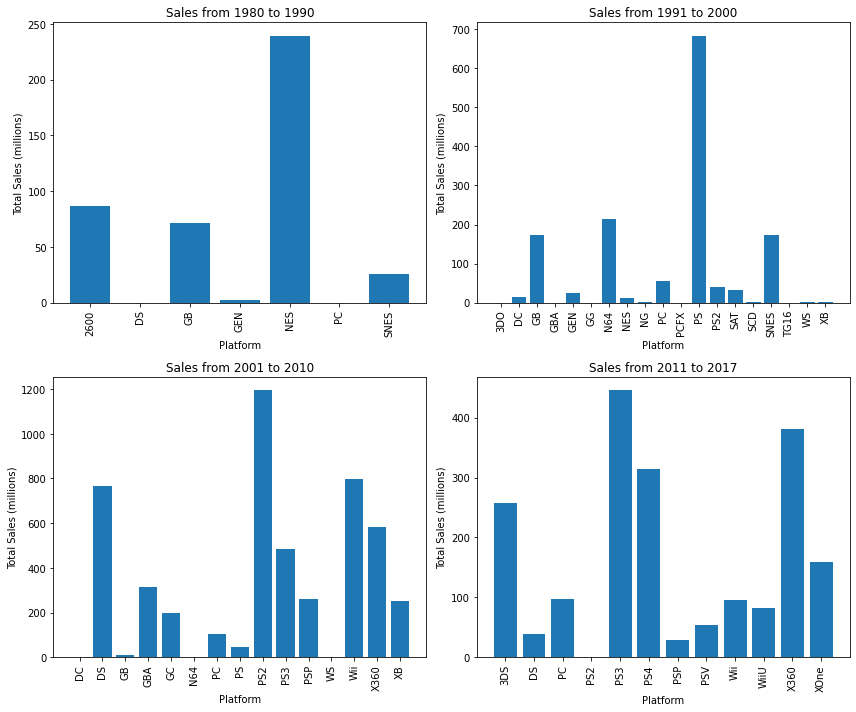

In [31]:
periods = [(1980, 1990), (1991, 2000), (2001, 2010), (2011, 2017)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, (start_year, end_year) in enumerate(periods):
    sales_stacked = axes[i // 2, i % 2]  
    platforms = games_data[
        (games_data['year_of_release'] >= start_year) &
        (games_data['year_of_release'] <= end_year) &
        (games_data['year_of_release'] != 0)]

    platform_sales = platforms.groupby('platform')['total_sales'].sum().reset_index()
    
    sales_stacked.bar(platform_sales['platform'], platform_sales['total_sales'])
    sales_stacked.set_title(f'Sales from {start_year} to {end_year}')
    sales_stacked.set_xlabel('Platform')
    sales_stacked.set_ylabel('Total Sales (millions)')
    sales_stacked.set_xticklabels(platform_sales['platform'], rotation=90)
    
plt.tight_layout()
plt.show()

Geramos então 4 gráficos pra cada período de 10 anos (1980-1990, 1991-2000, 2001-2010, 2011-2017). Cada gráfico apresenta o total de vendas em milhões de USD de cada plataforma, somando todos os jogos daquelas plataformas naquele período. 
Desses gráficos podemos tirar algumas conclusões:

1) Existem poucas plataformas que aparecem em dois gráficos com valores relevantes. Podemos checar o PS3 aparecendo no período de 2001 a 2010 com aproximadamente 500 milhões e novamente entre 2011 e 2017 sendo o maior valor. Checando o ano de lançamento da plataforma, podemos identificar que os primeiros jogos foram lançados por volta de 2006/2007. Analisando o perfil de pico encontrado na tabela pivot feita antes, as plataformas atingem um alto valor de vendas após alguns anos do seu lançamento. Então o PS3 por exemplo foi relevante nessa mudança de década, assim como X360, Wii, DS e PSP (com valores um pouco menores).

2) Outras plataformas apresentaram picos exclusivamente na década de lançamento, e muito menor em vendas totais quando comparadas à outras, como é o caso de muitas pltaformas na década de 90, como PCFX, SAT e NG. O mesmo ocorre na década de 80 com o 2600. 

3) Desse modo podemos estimar o tempo de desaparecimento de uma plataforma. Analisando esses gráficos podemos ver que, para as plataformas mais rentáveis, o tempo de vida útil do console gira em torno 8 anos, pois nenhum console mantém um pico muito alto por duas décadas seguidas com os primeiros jogos sendo lançados no início de uma década. 

4) Plataformas menos rentáveis tendem a manter a mesma quantidade de anos de vida útil, com algumas poucas exceções como o GEN, que durou 5 anos. 

5) As plataformas com maior número de vendas totais são: NES, GB, SNES, N64, PS1, DS, GBA, PS2, PS3, PSP, Wii, X360, XB, 3DS, PS4, PC, WiiU e XOne. Todos esses consoles são vinculados à três grandes empresas: Sony, Microsoft e Nintendo. 

Vamos visualizar um gráfico com as tendências de venda ano a ano das 10 plataformas com maiores vendas:

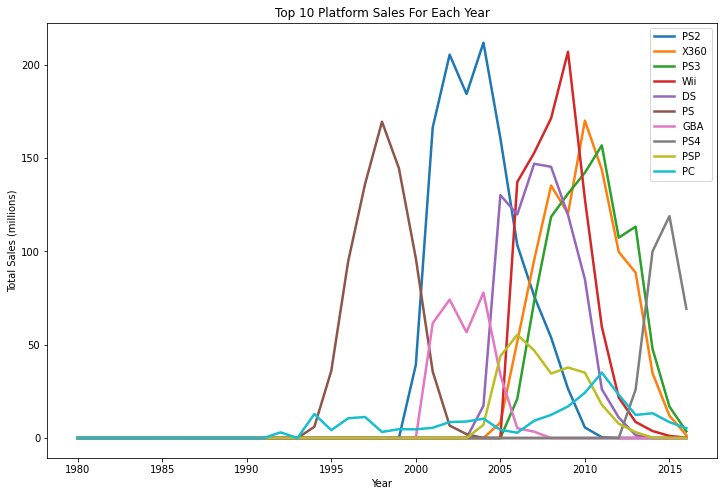

In [32]:
top_10_platforms = games_data.groupby('platform')['total_sales'].sum().nlargest(10).index

plt.figure(figsize=(12, 8))

for platform in top_10_platforms:
    plt.plot(games_data_pivot.columns, games_data_pivot.loc[platform], label=platform, linewidth=2.5)
    
plt.xlabel('Year')  
plt.ylabel('Total Sales (millions)')  
plt.title('Top 10 Platform Sales For Each Year')
plt.legend() 
plt.show() 

Esse é o perfil de faturamento das 10 plataformas mais rentáveis de todas. A última posição, PC, apresenta um perfil bem abaixo das outras. Claramento podemos verificar os picos de vendas de plataformas baseado nos períodos de atividade daqueles consoles. 

Desse modo podemos verificar um padrão de ascendencia e decadência de cada plataforma, nos permitindo uma estimativa coerente e eficiente para os próximos anos. 

É importante incluir na nossa análise plataformas que não apareceram no top 10 mas ainda assim possuem jogos sendo lançados, com o XOne.

Para nossa análise vamos utilizar um período de 5 anos, partindo de 2012. Como é uma análise de curto prazo pra apenas um ano, acredito que 5 anos é um período confiável pra nossa análise. Ele vai mostrar a decadencia das plataformas anteriores e a ascenção das plataformas novas. Como encontramos um padrão nos valores de vendas dessas plataformas no decorrer dos anos é possível prever de maneira confiável como serão os próximos anos se baseando nos anos recentes das plataformas anteriores.

Como vamos trabalhar com os dados a partir de 2012, vamos excluir todos os valores anteriores à 2012. Isso vai excluir plataformas já defasadas, jogos muito antigos e outros parâmetros que poderiam interferir na nossa análise de período atual. 

# 3.2.2 Análise dos anos recentes e das plataformas mais atuais

In [33]:
newest_games = games_data[games_data['year_of_release'] >= 2011]
newest_games = newest_games[newest_games['year_of_release'] != 0]
newest_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [34]:
newest_games.groupby('platform')['total_sales'].sum()

platform
3DS     257.81
DS       38.73
PC       97.68
PS2       0.45
PS3     445.57
PS4     314.14
PSP      29.01
PSV      53.81
Wii      95.02
WiiU     82.19
X360    380.38
XOne    159.32
Name: total_sales, dtype: float64

In [35]:
newest_games_pivot = pd.pivot_table(newest_games[newest_games['year_of_release'] != 0], 
                                  values = 'total_sales', 
                                  index = 'platform', 
                                  columns = 'year_of_release',
                                  aggfunc = 'sum',
                                  fill_value = 0)
newest_games_pivot

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.20,51.36,56.57,43.76,27.78,15.14
DS,26.18,11.01,1.54,0.00,0.00,0.00
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS2,0.45,0.00,0.00,0.00,0.00,0.00
PS3,156.78,107.36,113.25,47.76,16.82,3.60
PS4,0.00,0.00,25.99,100.00,118.90,69.25
PSP,17.82,7.69,3.14,0.24,0.12,0.00
PSV,4.63,16.19,10.59,11.90,6.25,4.25
Wii,59.65,21.71,8.59,3.75,1.14,0.18


Partindo de 2011 podemos observar um período de transição de plataformas, onde plataformas novas foram lançadas e outras etão perdendo seu potencial. 

1) Plataformas novas: PS4/XOne/WiiU/PSV são plataformas que estão crescendo ano a ano após seu lançamento. São ótimas plataformas pra se investir, principalmente o PS4, que é a plataforma que vêm aprensentando a maior receita nos últimos anos, e a tendência é de que isso continue quando observamos outros consoles anteriores a ele, como PS2 e PS3. O XOne também apresenta um bom padrão, embora tenha tido uma decaída no ano de 2016. Mas com somente 4 anos de vida é esperado que a plataforma ainda mantenha um pouco sua longevidade.

2) Plataformas obsoletas: nesse período as plataformas antigas chegaram a um valor de vendas de 0, como o caso do PSP, ou estão diminuindo muito suas vendas, como é o caso do Wii, X360, PS3 e DS. Essas plaaformas que apresentaram uma queda muito brusca nas suas vendas são justamente as predecessoras das plataformas novas, então é coerente que ocorra uma perda de valor nesses consoles.

O caso mais atípico dessa lista é o PC. Ele manteve um valor bem estável nos anos anteriores porém teve uma queda brusca recentemente. Porém para o caso do PC não existe o perigo de tempo de vida, pois é uma plataforma que não perde seus clientes pois mesmo que o usuário troque de PC, ele ainda terá acesso aos seus jogos.

Vamos agora checar as vendas globais de cada jogo por plataforma, e ver quais informações podemos retirar desses dados. Pra isso vou gerar boxplots.

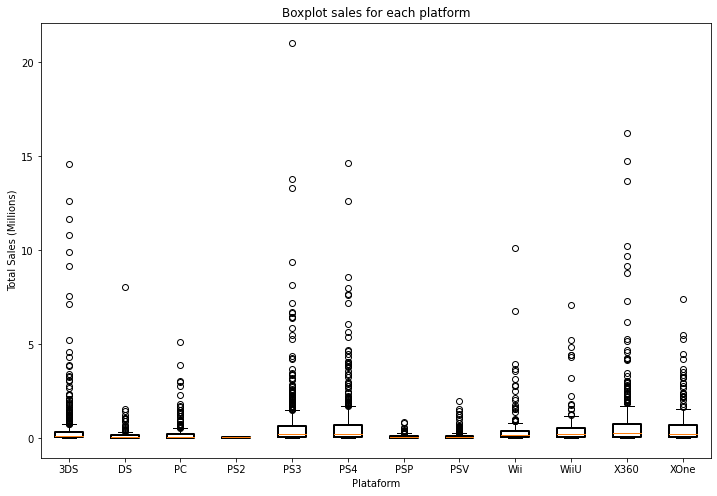

In [36]:
platform_groups = newest_games.groupby('platform')['total_sales'].apply(list)

plt.figure(figsize = (12,8))
boxprops = dict(linewidth=2)
plt.boxplot(platform_groups.values, labels=platform_groups.index, boxprops=boxprops)
plt.xlabel('Plataform')
plt.ylabel('Total Sales (Millions)')
plt.title('Boxplot sales for each platform')

plt.show()

Com esses boxplots podemos analisar as diferenças entre as médias por plataforma e os outliers de cada uma.

Com relação às médias: Todas plataformas possuem uma mediana de venda muito próxima. Algumas possuem uma mediana um pouco acima, como o X360, PS3 e PS4, mas no geral elas possuem valores muito próximos.

Com relação às diferenças nas vendas: Algumas plataformas possuem outliers muito exarcebados, como as plataformas PS3, PS4, X360, XOne e 3DS. Essas plataformas claramente tiveram jogos que foram extremamente bem sucedidos em vendas. No entanto, todas plataformas apresentam pelo menos alguns sucessos no seu histórico.

Com base nisso, podemos definir algumas plataformas mais populares pra realizar uma análise relacionada às avaliações de usuários e críticas. Pra isso vamos escolher uma dentre que tiveram mais sucessos com diferentes jogos: 3DS, PS3, PS4, X360 e XOne. Escolhi o PS3, por ser um plataforma um pouco mais antiga e possuir o maior outlier de todos.

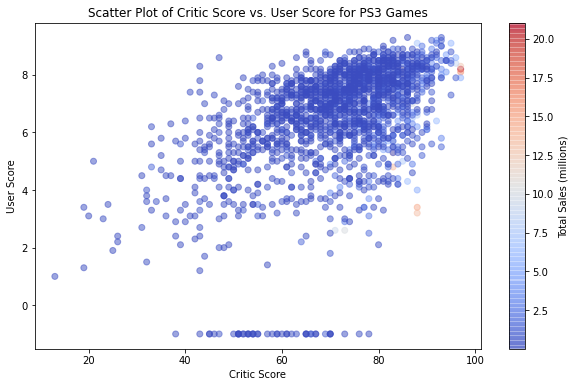

In [37]:
x = newest_games['critic_score']
y = newest_games['user_score']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=newest_games['total_sales'], cmap='coolwarm', alpha=0.5)
plt.colorbar(scatter, label='Total Sales (millions)')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('Scatter Plot of Critic Score vs. User Score for PS3 Games')

plt.show()

  Esse gráfico de dispersão mostra como as vendas aumentam quando as notas do público e da crítica aumenta. Jogos que possuem notas boas nos dois parâmetros apresentam um perfil de vendas muito alto. A maior densidade de dados se encontra justamente na região de notas 6-8 e 60-80 para ambas avaliações. Alguns casos atípicos são jogos que se aproximam de nota 90 na crítica, mas possuem aproximadamente nota 4 com os usuários, e mesmo assim possuem uma alta quantidade de vendas. 
  
  Além disso, temos alguns valores onde a nota da crítica está zerada. São valores ausentes que identificamos anteriormente. 
  
  Essa correlação entre as vendas e as notas pode ser facilmente verificada:

In [38]:
newest_games['total_sales'].corr(newest_games['critic_score'])

0.3299765050114585

Com relação à nota da crítica, temos uma correlação de 33%. Isso indica uma correlação moderada, mostrando que conforme as notas aumentam, a tendência é que as vendas aumentem também. Porém é apenas um indicativo de tendência. 

In [39]:
newest_games['total_sales'].corr(newest_games['user_score'])

0.15030421726131543

Enquanto que para às críticas de usuário temos uma correlação de 15%, que é uma correlação fraca.

Com isso podemos inferir que as notas da crítica possuem um impacto maior na decisão de compras dos usuários do que as próprias notas dos jogadores. Jogos que possuem uma melhor avaliação pelos profissionais tendem a vender mais, enquanto jogos bem avaliados por jogadores não necessariamente vendem mais.

Um dos motivos claramente mais impactante pra isso é o Gênero. Não é porque um jogo de um determinado gênero é aclamado pela crítica que ele vai ser aclamado pelos jogadores, e o contrário também é plausível. Jogos excelentes para os jogadores podem não ser necessariamente aclamados pela crítica especializada.

Pra garantir isso, podemos checar o sucesso dos jogos que foram lançados em mais de uma plataforma. Vamos comparar jogos iguais nas cinco plataformas que definimos anteriormente como mais populares: 3DS, PS3, PS4, X360 e XOne.

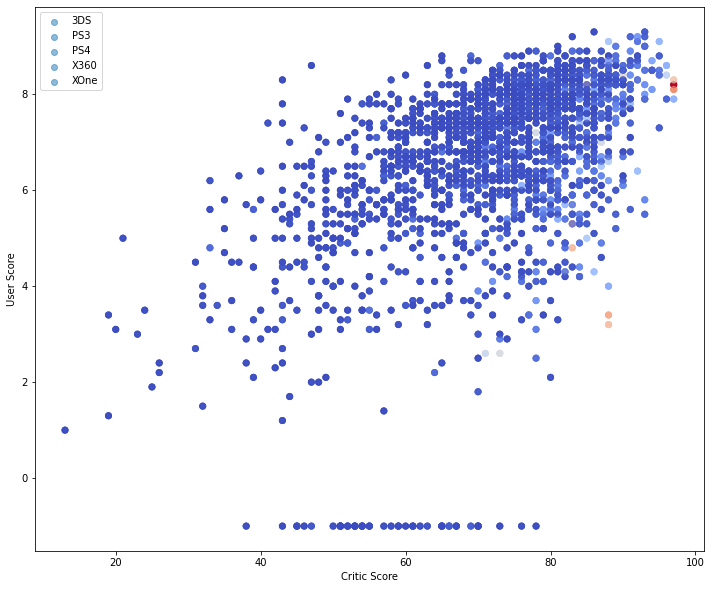

In [40]:
popular_plats = ['3DS', 'PS3', 'PS4', 'X360', 'XOne']

games_popular_plats = newest_games[newest_games['platform'].isin(popular_plats)]
same_games = games_popular_plats[games_popular_plats.duplicated(subset='name', keep=False)]

colors = {'3DS': 'blue', 'PS3': 'red', 'PS4': 'black', 'X360': 'green', 'XOne': 'grey'}

plt.figure(figsize=(12, 10))

for plataform, colors in colors.items():
    games_plats = same_games[same_games['platform'] == plataform]
    plt.scatter(newest_games['critic_score'], newest_games['user_score'], label=plataform, c=newest_games['total_sales']*10, 
                cmap = 'coolwarm',
                alpha=0.5,)

plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.legend()
plt.show()

Obtivemos um mapa de dispersão muito parecido com o que geramos anteriormente, mas com menos valores. Isso mostra que os jogos iguais que foram lançados em uma mesma plataforma mantém o mesmo perfil de venda independente da plataforma, mas com valores de avaliações de crítica e usuários próximos.

Vamos agora avaliar os gêneros dos jogos. Com gráficos de barras podemos facilmente identificar quais gêneros são mais lucrativos e populares.

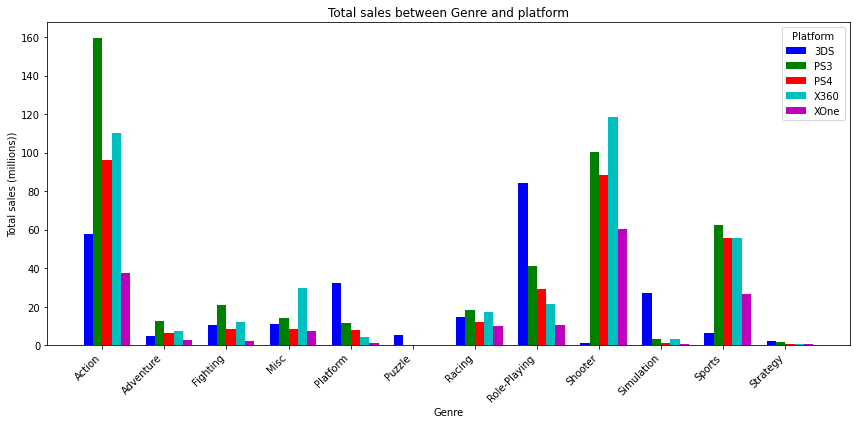

In [41]:
popular_plats = ['3DS', 'PS3', 'PS4', 'X360', 'XOne']
genre_sales = newest_games.groupby(['genre', 'platform'])['total_sales'].sum().unstack().loc[:, popular_plats]
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15
x = np.arange(len(genre_sales.index))
colors = ['b', 'g', 'r', 'c', 'm']

for i, popular_plats in enumerate(popular_plats):
    ax.bar(x + width * i, genre_sales[popular_plats], width=width, label=popular_plats, color=colors[i])

ax.set_xlabel('Genre')
ax.set_ylabel('Total sales (millions))')
ax.set_title('Total sales between Genre and platform')
ax.set_xticks(x + width * (len(popular_plats) - 1) / 2)
ax.set_xticklabels(genre_sales.index, rotation=45, ha='right')
ax.legend(title='Platform')

plt.tight_layout()
plt.show()


Comparando todos os gêneros existente nos nossos dados com as plataformas mais populares podemos retirar diversas informações:

1) Os gêneros mais lucrativos são Action, Role-playing, Shooter e Esportes, com o gênero de Ação sendo o mais vendido.

2) Os gêneros com mais vendas variam dependendo da plataforma. Jogos de Shooter e Action muito mais predominantes nas plataformas da Sony e da Microsoft do que no 3DS da Nintendo. Em contrapartida, existem gêneros que são muito mais impactantes no 3DS, como Role-Playing, Platform, Puzzle e Simulation.

3) Podemos generalizar quais gêneros possuem uma maior tendência lucrativa dependendo da plataforma, e também podemos identificar facilmente quais não possuem muito apelo do público, como o gênero Strategy.

# 3.3. Perfis de Usuário

Regiões diferentes costumam ter preferência por coisas diferentes. Podemos identificar quais são as preferências por região e identificar quais são as tendências pra cada lugar. Essa é uma abordagem que nos ajuda identificar quais são as tendências do público dependendo do lugar do mundo e selecionar melhor as estratégias dependendo do local.

Primeiro vamos checar como é o comportamento das plataformas em cada região.

In [42]:
platform_sales = newest_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
platform_sales

,na_sales,eu_sales,jp_sales
platform,,,
3DS,82.65,61.27,100.62
DS,18.86,9.24,8.04
PC,29.88,56.70,0.00
PS2,0.13,0.13,0.09
PS3,168.26,163.10,49.39
PS4,108.74,141.09,15.96
PSP,2.19,1.77,24.04
PSV,12.47,13.07,21.84
Wii,48.56,29.60,8.97


In [43]:
top_platforms_na = platform_sales.nlargest(5, 'na_sales').index
top_platforms_eu = platform_sales.nlargest(5, 'eu_sales').index
top_platforms_jp = platform_sales.nlargest(5, 'jp_sales').index

print("NA:")
print(top_platforms_na)
print("\nEU:")
print(top_platforms_eu)
print("\nJP:")
print(top_platforms_jp)


NA:
Index(['X360', 'PS3', 'PS4', 'XOne', '3DS'], dtype='object', name='platform')

EU:
Index(['PS3', 'PS4', 'X360', '3DS', 'PC'], dtype='object', name='platform')

JP:
Index(['3DS', 'PS3', 'PSP', 'PSV', 'PS4'], dtype='object', name='platform')


Podemos verificar que as tendências são bem diferentes de região pra região. Enquanto no NA a plataforma com mais vendas de jogos é o X360, na Europa é o PS3, e no Japão o 3DS. Na Europa aparece o PC, enquanto no Japão aparece o PSV, que nem estávamos considerando como uma plataforma relevante. 

Isso mostra que pra validar bem esse estudo, as análises regionais são importantíssimas, pois o perfil do consumidor muda consideravelmente dependendo do lugar.

Se as plataformas de escolha mudam dependendo do lugar, vamos checar os gêneros de jogos. 

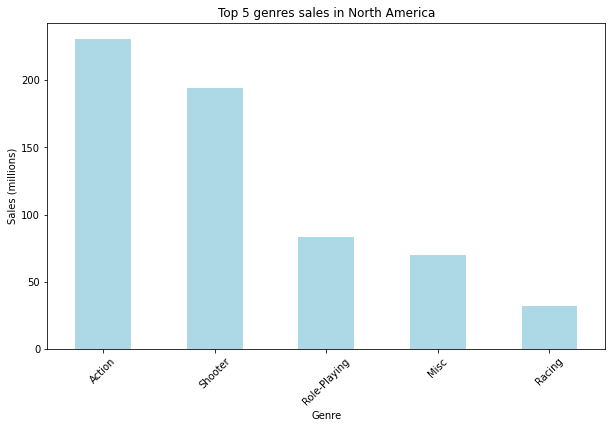

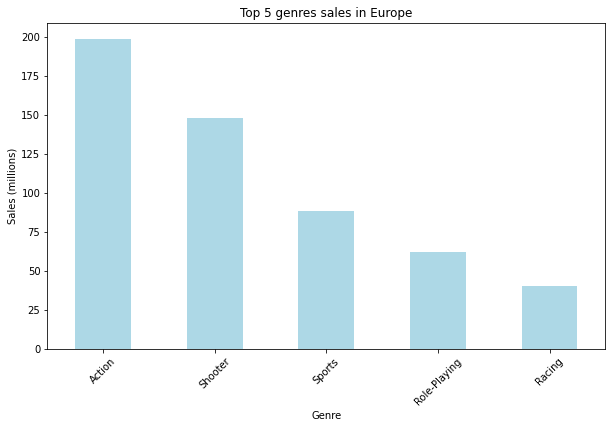

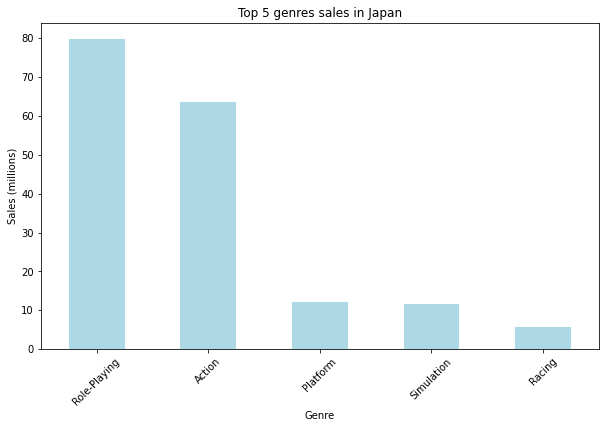

In [44]:
def top_genres_bar_chart(df, region_column, region_name):

    top_genres = df.sort_values(by=region_column, ascending=False)['genre'].unique()[:5]
    filtered_df = df[df['genre'].isin(top_genres)]
    genre_sales = filtered_df.groupby('genre')[region_column].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    genre_sales.plot(kind='bar', color='lightblue')
    plt.title(f'Top 5 genres sales in {region_name}')
    plt.xlabel('Genre')
    plt.ylabel('Sales (millions)')
    plt.xticks(rotation=45)
    plt.show()

top_genres_bar_chart(newest_games, 'na_sales', 'North America')
top_genres_bar_chart(newest_games, 'eu_sales', 'Europe')
top_genres_bar_chart(newest_games, 'jp_sales', 'Japan')


Enquanto na Europa e América do Norte o gênero mais vendido é o de ação, no Japão existe uma prevalência grande de Role-Playing. Shooter que também bem forte nos outros dois é bem fraco no Japão, nem aparecendo no ranking. 

Um fator importante pra se levar em consideração, é que quando avaliamos os gêneros por plataforma, sem levarmos em consideração as regiões, o console 3DS apresenta altas quantidades de venda nos gêneros Platform e Simulation. Isso pode ser verificado novamente aqui. Temos a informação que o 3DS é a plataforma com mais vendas no Japão, e justamente no Japão os gêneros estão bem em alta, mostrando a dominância do 3DS no país.

Sabemos que o 3DS é uma plataforma com jogos mais infantis, então podemos esperar que exista uma diferença entre as vendas baseado na classificação etária no Japão devido à esse fato. 

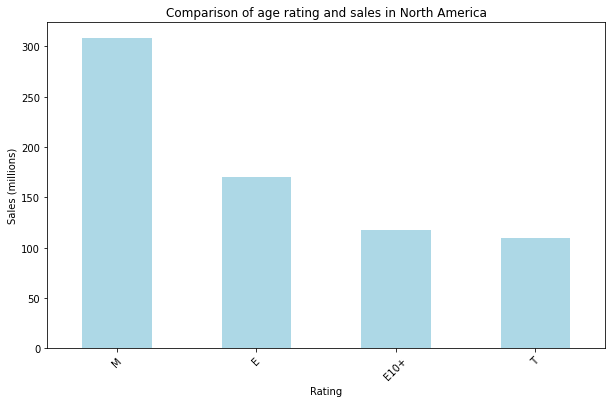

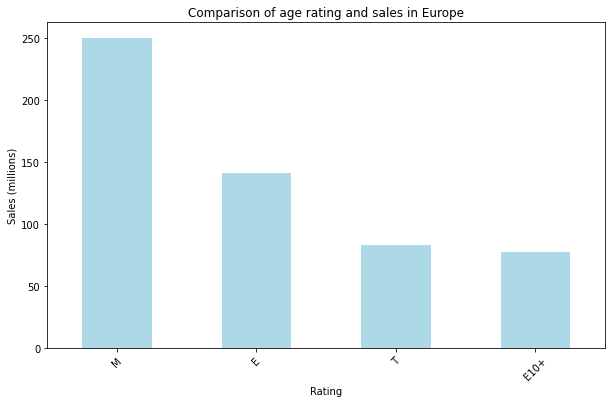

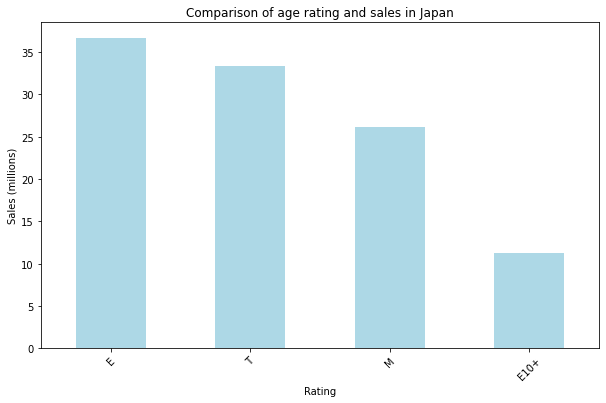

In [45]:
def top_ratings_bar_chart(df, region_column, region_name):

    top_ratings = df.sort_values(by=region_column, ascending=False)['rating'].unique()[:5]
    filtered_df = df[df['rating'].isin(top_ratings)]
    rating_sales = filtered_df.groupby('rating')[region_column].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    rating_sales.plot(kind='bar', color='lightblue')
    plt.title(f'Comparison of age rating and sales in {region_name}')
    plt.xlabel('Rating')
    plt.ylabel('Sales (millions)')
    plt.xticks(rotation=45)
    plt.show()

top_ratings_bar_chart(newest_games, 'na_sales', 'North America')
top_ratings_bar_chart(newest_games, 'eu_sales', 'Europe')
top_ratings_bar_chart(newest_games, 'jp_sales', 'Japan')


Como esperado, na América do Norte e Europa as classificações etárias com mais vendas são jogos com faixas M, que normalmente são as classificações existentes em jogos de ação e tiro, que são justamente os jogos com mais vendas nesses lugares. Enquanto isso, no Japão a faixa etária com maior venda é E, que é livre pra todos públicos. Como no 3DS existe essa prevalência de jogos infantis e juvenis, faz sentido esses valores. 

Também é algo a ser levado em consideração na nossa análise de público.

# 4.1Testes de Hipóteses

Vamos agora realizar alguns testes de hipóteses, que possuem o intuito de validar nosso estudo e análise, mostrando que existe um efeito de impacto entre nossos parâmetros.

A primeira hipótese que vamos testar é a hipótese que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

Vamos utilizar um teste de hipótese de duas amostras independentes, pois temos duas amostragens de classificação. 

Definindo hipóteses:

    - H0 (hipótese nula): a média das classificações dos usuários das plataformas Xbox One é igual à média das classificações dos usuários do PC.
    
    - H1 (hipótese alternativa): a média das classificações dos usuários das plataformas Xbox One não é igual à média das classificações dos usuários do PC.

Primeiro vamos criar dois dataframes separados, um pro XOne e um pro PC. Depois disso, vamos filtrar somente as avaliações de usuário de cada plataforma. Antes de realizar o teste t, vou realizar um teste de Levene pra checar a igualddaae das variâncias entre as amostras.

In [46]:
xone_data = newest_games[newest_games['platform'] == 'XOne']
pc_data = newest_games[newest_games['platform'] == 'PC']

user_score_xone = xone_data['user_score'].dropna()
user_score_pc = pc_data['user_score'].dropna()

alfa = 0.05

levene_test = st.levene(user_score_xone, user_score_pc)
if levene_test.pvalue < alfa:
    print('Hipótese nula rejeitada. Rejeitamos que a variância dos grupos são iguais')
else: 
    print('Hipótese nula não pode ser rejeitada. Aceitamos que a variância dos dois grupos podem ser iguais.')

levene_test

Hipótese nula não pode ser rejeitada. Aceitamos que a variância dos dois grupos podem ser iguais.


LeveneResult(statistic=1.5593347116587029, pvalue=0.21232889256400164)

In [47]:
results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=True)
if results.pvalue < alfa:
    print('Hipótese nula rejeitada')
else:
    print('Hipótese nula não pode ser rejeitada')
    
results

Hipótese nula não pode ser rejeitada


Ttest_indResult(statistic=0.25959660918413513, pvalue=0.7952784921572927)

Se a hipótese nula não pode ser rejeitada então não existem evidências estatísticas que garantem que não existem diferenças significativas nas avaliações de usuários de ambas as plataformas.

Agora vamos testar outra hipótese: As classificações médias de usuários para gênero Action e Sports são diferentes. 

Definindo hipóteses:

    - H0 (hipótese nula): a média das classificações dos usuários para os gêneros de ação não é diferente da média das classificações dos usuários para os gêneros de esporte
    
    - H1 (hipótese alternativa): a média das classificações dos usuários para os gêneros de ação é diferente da média das classificações dos usuários para os gêneros de esporte
    
Vamos utilizar a mesma metodologia. Fatiar os jogos desse gênero, e fatiar então o user_score desses jogos. Após isso, vamos realizar o teste t de Student novamente.

In [48]:
action_data = newest_games[newest_games['genre'] == 'Action']
sports_data = newest_games[newest_games['genre'] == 'Sports']

user_score_action = action_data['user_score'].dropna()
user_score_sports = sports_data['user_score'].dropna()

alfa = 0.05

levene_test = st.levene(user_score_action, user_score_sports)
if levene_test.pvalue < alfa:
    print('Hipótese nula rejeitada. Rejeitamos que a variância dos grupos são iguais')
else: 
    print('Hipótese nula não pode ser rejeitada. Aceitamos que a variância dos dois grupos podem ser iguais.')

levene_test

Hipótese nula rejeitada. Rejeitamos que a variância dos grupos são iguais


LeveneResult(statistic=8.817914584803045, pvalue=0.0030514529065585596)

In [49]:
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)
if results.pvalue < alfa:
    print('Hipótese nula rejeitada')
else:
    print('Hipótese nula não pode ser rejeitada')
    
results

Hipótese nula rejeitada


Ttest_indResult(statistic=7.007784597289385, pvalue=7.718088834472571e-12)

Dessa vez obtivemos o resultado onde a hipótese nula pode ser rejeitada, o que mostra que existem evidências estatísticas que garantem que a média das avaliações é diferente entre os dois gêneros.

# 1.6 Conclusões

A análise dos dados dos jogos foi longa e nos forneceu uma alta quantidade de informações. 

Primeiramente: no início tivemos alguns problemas relacionados à estrutura dos dados, e precisei fazer o pré-processamento dos dados pra preparar a nossa análise. Realizei mudanças nos formatos de algumas colunas, mudei títulos de colunas que estavam em letra maíuscula pra letra minúscula. Tratei e excluí dados ausentes que não teriam impacto na nossa análise. Chequei quais jogos que possuiam 'tbd' e se era um erro ou proposital. 

Com os dados pré-tratados, voltamos à nossa pergunta original: quais são os parâmetros que influenciam no sucesso de um jogo? 

Analisamos todos dados a partir de 2012: plataformas, notas, regiões, faixa etária, gênero dos jogos. E pudemos traçar alguns resultados.

Plataformas: as plataformas que tiveram mais jogos vendidos mundialmente desde 2012 foram 3DS, PS3, PS4, Xbox 360 e Xbox One, porém esse resultado é encontrado quando analisamos a soma de vendas totais em todas regiões. Quando nos aprofundamos e realizamos análises regionais, os resultados mudam. 

Regiões: as plataformas com jogos mais vendidos em cada região foram:

    NA: Xbox 360, PS3, PS4, XOne, 3DS 
    EU: PS3, PS4, X360, 3DS, PC 
    JP: 3DS, PS3, PSP, PSV, PS4

Isso mostra que o perfil de consumo de cada região varia muito. Todas plataformas mais consumidas no Japão são originalmente Japonesas (Sony e Nintendo). Na Europa tem a relevância do Computador, que não aparece em nenhuma outra. Já na América do Norte temos o mesmo padrão encontrado globalmente. Isso acontece pois é justamente a região que tem a maior quantidade de vendas nas cinco plataformas, logo é a região que dita a tendência quando fazemos uma análise global.

Notas: avaliamos se as notas da crítica e dos usuários afetam de algum modo as vendas dos jogos, e a conclusão é que sim. Jogos com notas altas tanto da crítica especializada quanto dos jogadores apresentaram uma maior tendência de vendas, mostrando que é um fator importante. No entanto, jogos que não possuiam avaliações da crítica ainda assim tiveram uma boa performance de vendas, mostrando que é um fator importante mas não decisivo. Isso é corroborado pela correlação de 33% que encontramos entre as vendas e as notas da crítica. 

Faixa Etária: Como dito anteriormente, a região onde a faixa etária tem mais impacto é no Japão. Isso acontece pela faixa etária nos jogos do 3DS, que é o console mais consumido no país. Isso explica a alta quantidade de vendas de jogos mais infantis nessa região. 

Gênero: Também ocorre uma mudança no Japão, onde gêneros exclusivos para o portátil 3DS são bem relevantes, como Plataforma e Simuladores. 

Com bases nessas conclusões, podemos sugerir que campanhas publicitárias específicas por regiões sejam consideradas. No Japão existe uma grande preferência por plataformas japonesas, então promover esse tipo de conteúdo é uma boa estratégia. Já na Europa existe a relevância do PC, então talvez algum tipo de promoção como um market place digital de jogos pra computador pra fazer concorrência com os já existentes seja uma boa estratégia. 

É importante levar em conta a região que nossas promoções serão feitas e adequar de acordo.